In [1]:
# -------------------------------------------------------------
# LINEAR REGRESSION ON CALIFORNIA HOUSING DATASET
# -------------------------------------------------------------
# Objective:
# Predict median house values in California using numerical features.
# -------------------------------------------------------------

# Import core libraries
import numpy as np                     # for numerical operations
import pandas as pd                    # for data handling
from sklearn.datasets import fetch_california_housing  # dataset loader
from sklearn.model_selection import train_test_split   # for splitting data
from sklearn.linear_model import LinearRegression       # ML model
from sklearn.metrics import mean_squared_error, r2_score  # evaluation metrics
import matplotlib.pyplot as plt         # for plotting
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [3]:

# -------------------------------------------------------------
# 1. Load the dataset
# -------------------------------------------------------------
data = fetch_california_housing(as_frame=True)
df = data.frame                         # convert to pandas DataFrame

# Inspect first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:

# -------------------------------------------------------------
# 2. Define features (X) and target (y)
# -------------------------------------------------------------
X = df.drop("MedHouseVal", axis=1)      # all input columns except target
y = df["MedHouseVal"]                   # target column


In [5]:

# -------------------------------------------------------------
# 3. Split data into training and testing sets
# -------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:

# -------------------------------------------------------------
# 4. Create and train the Linear Regression model
# -------------------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:

# -------------------------------------------------------------
# 5. Make predictions
# -------------------------------------------------------------
y_pred = model.predict(X_test)


In [7]:

# -------------------------------------------------------------
# 6. Evaluate model performance
# -------------------------------------------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
R² Score: 0.5758


In [6]:
# Ridge Regression
ridge_model = Pipeline([
    ("scaler", StandardScaler()),           # Standardize features (mean=0, std=1)
    ("ridge", Ridge(alpha=1.0))             # alpha controls regularization strength
])

ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f"Ridge Regression → RMSE: {ridge_rmse:.4f}, R²: {ridge_r2:.4f}")

# Lasso Regression
lasso_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=0.1))
])

lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f"Lasso Regression → RMSE: {lasso_rmse:.4f}, R²: {lasso_r2:.4f}")

Ridge Regression → RMSE: 0.7456, R²: 0.5758
Lasso Regression → RMSE: 0.8244, R²: 0.4814


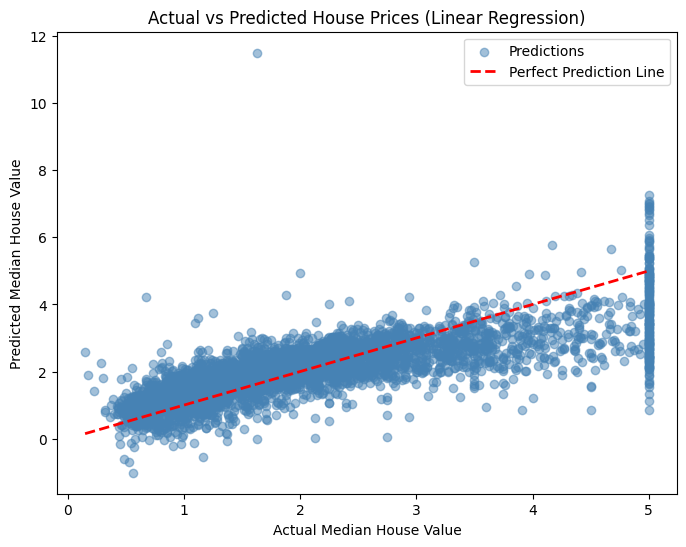

In [8]:

# -------------------------------------------------------------
# 7. Visualize predictions vs actual values
# -------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='steelblue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Prices (Linear Regression)")
plt.legend()
plt.show()


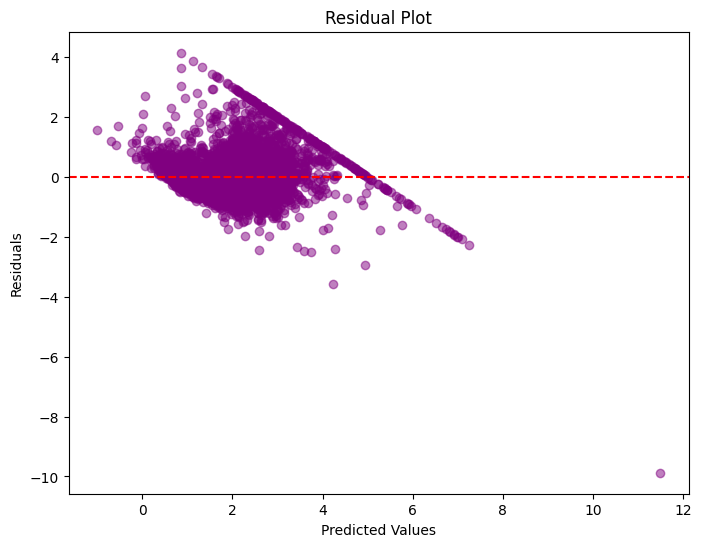

In [9]:

# -------------------------------------------------------------
# 8. Visualize residuals (errors)
# -------------------------------------------------------------
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
